In [1]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np

# scikit-learn imports
from sklearn import datasets                          # to import iris dataset
from sklearn.model_selection import train_test_split  # to split data into training/test sets
from sklearn.preprocessing import StandardScaler      # for feature scaling
from sklearn.metrics import accuracy_score            # to calculate accuracy metrics

# import plot_decision_regions function
from helper import plot_decision_regions

# Sigmoid Function

In [2]:
def sigmoid(z):
    """Define the logistic sigmoid function."""
    
    return 1.0 / (1.0 + np.exp(-z))

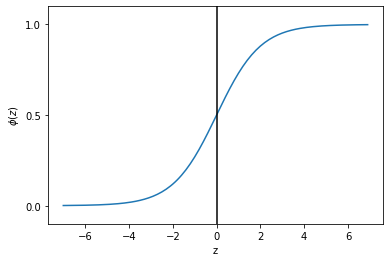

In [3]:
# find the sigmoid for z in range [-7, 7]
z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

# plot sigmoid function
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0, 0.5, 1.0])
plt.show()

# Cost function

In [4]:
def cost_1(z):
    """Define cost function when y=1."""
    
    return - np.log(sigmoid(z))


def cost_0(z):
    """Define cost function when y=0."""
    
    return - np.log(1 - sigmoid(z))

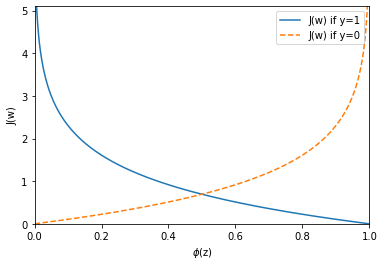

In [5]:
# find the sigmoid for z in range [-10, 10]
z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

# find cost when y=1 and y=0
c1 = [cost_1(x) for x in z]
c0 = [cost_0(x) for x in z]

# plot cost functions
plt.plot(phi_z, c1, label='J(w) if y=1')
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.show()

# Implementing Logistic Regression from Scratch

In [6]:
# import LogisticRegressionGD class
from logistic_regression import LogisticRegressionGD

The below cell is the same data preparation as in `01-perceptron.ipynb`. 

In [7]:
# load iris dataset
iris = datasets.load_iris()

# assign matrix X and vector y
X = iris.data[:, [2, 3]]
y = iris.target

# split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

# initialize and fit object
sc = StandardScaler()
sc.fit(X_train)

# standardize features
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

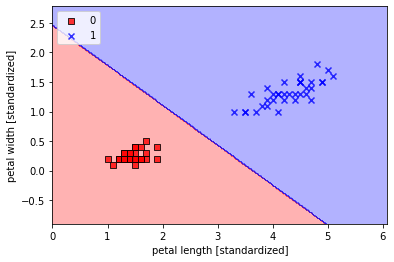

In [8]:
# filter data for setosa and versicolor flowers only
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)]
y_train_01_subset = y_train[(y_train == 0) | (y_train == 1)]

# initialize and fit logistic regression
lrgd = LogisticRegressionGD(eta=0.05, 
                            n_iter=1000,
                            random_state=1)
lrgd.fit(X_train_01_subset,
         y_train_01_subset)

# plot decision regions
plot_decision_regions(X=X_train_01_subset, 
                      y=y_train_01_subset,
                      classifier=lrgd)
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# Implementing Logistic Regression with `scikit-learn`

In [9]:
# import LogisticRegression model from scikit-learn
from sklearn.linear_model import LogisticRegression

# initialize and fit logistic regression model
lr = LogisticRegression(
    C=100.0, solver='liblinear',
    multi_class='auto', random_state=1
)
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

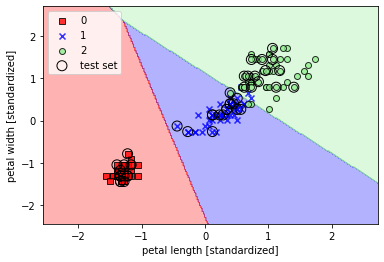

In [10]:
# combine training and test datasets
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

# plot decision regions
plot_decision_regions(X_combined_std,
                      y_combined, 
                      classifier=lr,
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [11]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [12]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0], dtype=int64)

In [13]:
lr.predict(X_test_std[:3, :])

array([2, 0, 0])

In [14]:
lr.predict(X_test_std[0, :].reshape(1, -1))

array([2])

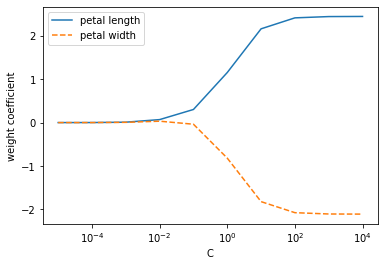

In [15]:
weights, c_params = [], []

# intialize and fit 10 logreg models for
# c = 10^-5, 10^-4, ..., 10^3, 10^4
for c in np.arange(-5, 5):
    lr = LogisticRegression(
        C=10.**c, solver='liblinear',
        multi_class='auto', random_state=1
    )
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    c_params.append(10.**c)

# flatten array of arrays into single array
weights = np.array(weights)

# plot L2-regularization for weights
plt.plot(c_params, weights[:, 0],
         label='petal length')
plt.plot(c_params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
plt.show()